In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tv = pd.read_csv('TV_Final.csv')
tv.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [3]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  901 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


In [4]:
tv.describe()

,Size,Selling Price,Original Price,Rating
count,912.000000,912.000000,912.000000,692.000000
mean,45.942982,59358.606360,81975.213816,4.234104
std,12.316492,65866.677856,84823.568826,0.366694
min,17.000000,4849.000000,6999.000000,2.000000
25%,32.000000,19797.500000,28990.000000,4.100000
50%,43.000000,36990.000000,52900.000000,4.300000
75%,55.000000,67064.250000,99900.000000,4.400000
max,85.000000,499990.000000,549990.000000,5.000000


In [5]:
tv.nunique() #studying the data

Brand                59
Resolution            5
Size                 27
Selling Price       515
Original Price      455
Operating System      7
Rating               25
dtype: int64

In [6]:
tv.isnull().sum() #checking existence of null values

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

In [7]:
tv

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3
...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,44999,57900,Linux,4.4
908,SONY,Full HD LED,40,41499,51900,Linux,4.6
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3
910,SONY,HD LED,32,32900,32900,Linux,4.4


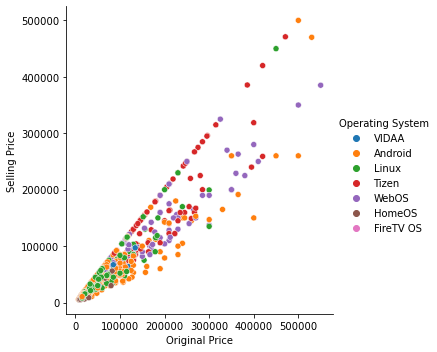

In [8]:
sns.relplot(x = 'Original Price', y='Selling Price', hue='Operating System', data=tv) #examining the relationship between original and selling price based on ratings

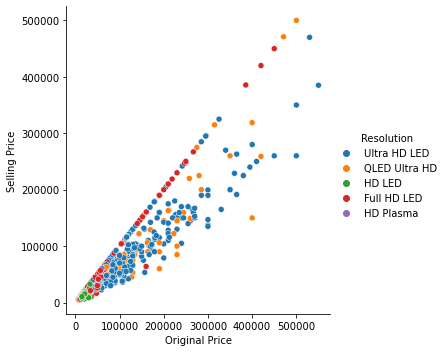

In [9]:
sns.relplot(x = 'Original Price', y='Selling Price', hue='Resolution', data=tv)

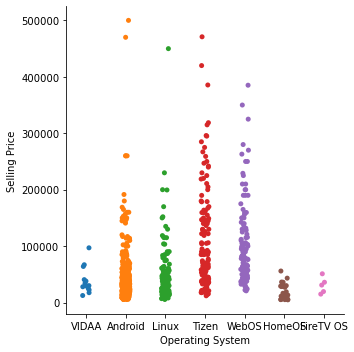

In [10]:
sns.catplot(x = 'Operating System', y='Selling Price', data=tv) #comparing the selling price of various tv OSs

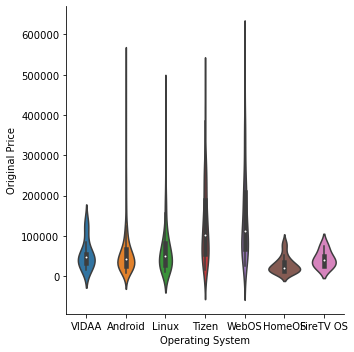

In [12]:
sns.catplot(x = 'Operating System', y='Original Price', data=tv, kind='violin')

C:\Users\The Oyondi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling Price', ylabel='Density'>

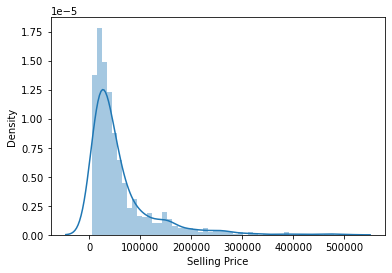

In [13]:
sns.distplot(tv['Selling Price'])


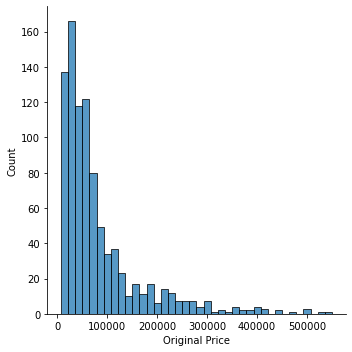

In [14]:
sns.displot(tv['Original Price'])

C:\Users\The Oyondi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Original Price', ylabel='Density'>

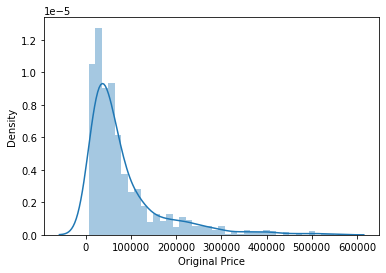

In [15]:
sns.distplot(tv['Original Price'])

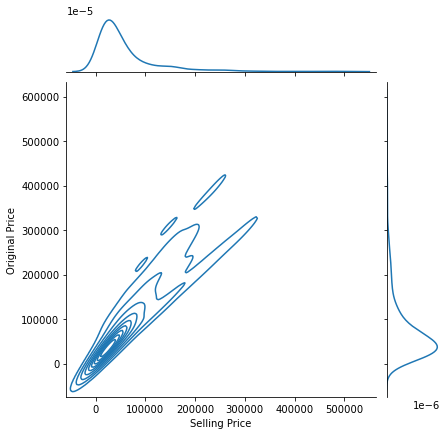

In [16]:
sns.jointplot(data=tv, x='Selling Price', y='Original Price', kind='kde')

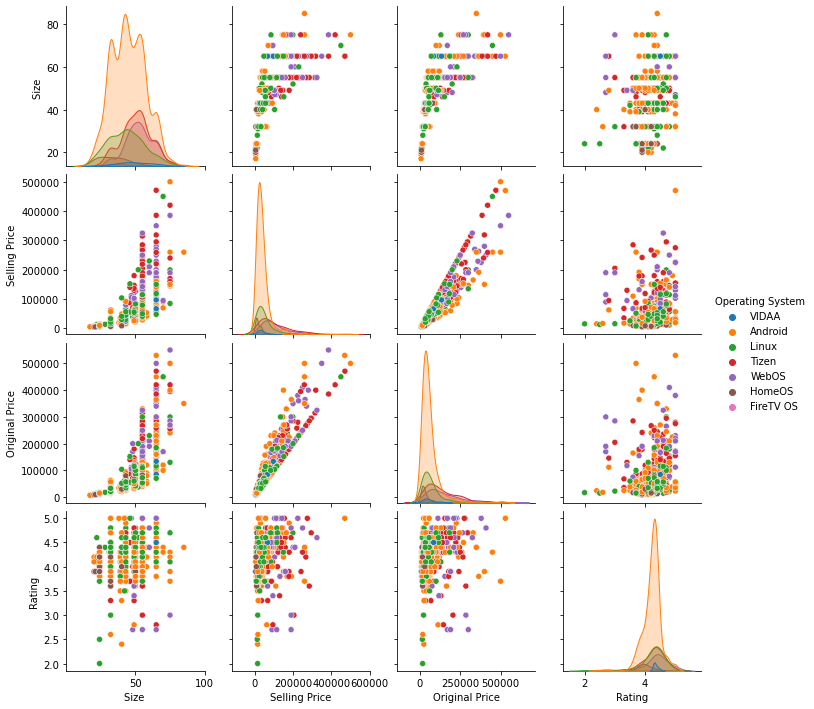

In [17]:
sns.pairplot(data=tv, hue='Operating System')

In [59]:
#finding the discounts given for the tv sales.
tv['discount'] = tv['Selling Price'] - tv['Original Price']
tv.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,profit,discount
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,-16991,-16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,-76991,-76991
2,realme,HD LED,32,13999,17999,Android,4.3,-4000,-4000
3,Mi,HD LED,32,14999,19999,Android,4.4,-5000,-5000
4,realme,HD LED,32,12999,21999,Android,4.3,-9000,-9000


<AxesSubplot:>

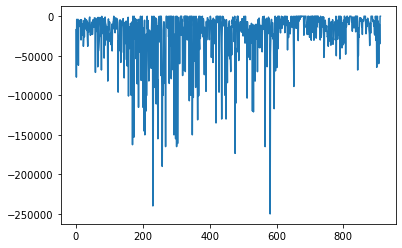

In [60]:
tv.discount.plot()

<AxesSubplot:xlabel='discount', ylabel='Count'>

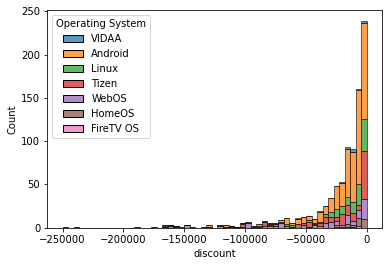

In [61]:
sns.histplot(data=tv, x='discount', hue='Operating System', multiple="stack")

In [22]:
#from the chart above, its notable that some tvs were sold up to 250,000 (discount) less than the original price.
#However, most of the tvs were sold 50000 less than the original cost.
#Another conclusion notable from the data is that, all the TVs regardless of the operating system did not generate profit, or were not sold more than the original price.
#These findings could be associated with discounts, customer bargaining and other factors. 

In [57]:
#tv_sales = tv.pivot("Brand", "Operating System", "profit")

# ax = sns.heatmap(tv_sales)
#tv_sales.shape

In [62]:
#finding the number of tvs sold by different brands and using varsious operating systems
cl_tvs = tv.groupby(['Operating System']).Brand.value_counts().unstack().fillna(0)
cl_tvs

Brand,AISEN,Acer,Adsun,Akai,BPL,Blaupunkt,Candes,CloudWalker,Compaq,Coocaa,...,Sharp,T-Series,TCL,TOSHIBA,Thomson,VG,Vu,Weston,iFFALCON by TCL,realme
Operating System,,,,,,,,,,,,,,,,,,,,,
Android,8.0,9.0,7.0,6.0,4.0,15.0,12.0,9.0,5.0,9.0,...,0.0,8.0,33.0,0.0,18.0,4.0,17.0,5.0,19.0,6.0
FireTV OS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HomeOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Linux,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,3.0,7.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0
Tizen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VIDAA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
WebOS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
cl_tvs.T #transposed the classified dataframe to display all the data clearly.
#This DF helped identify the predominant operating systems sed in producing the TVs sold by various brands. 
#Suprisingly, Android was predominant in almost all the TVs solds except for brands such as Dektron, Toshiba and few others 

Operating System,Android,FireTV OS,HomeOS,Linux,Tizen,VIDAA,WebOS
Brand,,,,,,,
AISEN,8.0,0.0,0.0,0.0,0.0,0.0,0.0
Acer,9.0,0.0,0.0,0.0,0.0,0.0,0.0
Adsun,7.0,0.0,0.0,0.0,0.0,0.0,0.0
Akai,6.0,0.0,0.0,0.0,0.0,0.0,0.0
BPL,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Blaupunkt,15.0,0.0,0.0,0.0,0.0,0.0,0.0
Candes,12.0,0.0,0.0,0.0,0.0,0.0,0.0
CloudWalker,9.0,0.0,0.0,0.0,0.0,0.0,0.0
Compaq,5.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Brand', ylabel='Operating System'>

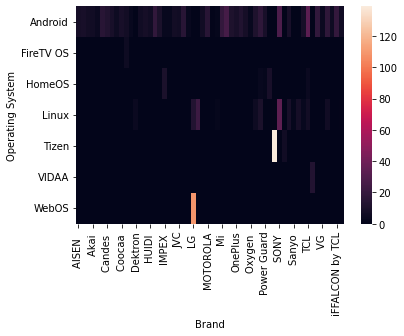

In [53]:
sns.heatmap(cl_tvs) #notable limitation with the heatmap in this case is that it is not scalable in case of multiple values. 

In [73]:
tv

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating,discount
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3,-16991
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4,-76991
2,realme,HD LED,32,13999,17999,Android,4.3,-4000
3,Mi,HD LED,32,14999,19999,Android,4.4,-5000
4,realme,HD LED,32,12999,21999,Android,4.3,-9000
...,...,...,...,...,...,...,...,...
907,SONY,Full HD LED,43,44999,57900,Linux,4.4,-12901
908,SONY,Full HD LED,40,41499,51900,Linux,4.6,-10401
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3,-35000
910,SONY,HD LED,32,32900,32900,Linux,4.4,0


In [74]:
tv.corr() #finding the correlation between the various numeric values

,Size,Selling Price,Original Price,Rating,discount
Size,1.000000,0.662693,0.730084,0.223092,-0.569395
Selling Price,0.662693,1.000000,0.939933,0.180150,-0.431801
Original Price,0.730084,0.939933,1.000000,0.174214,-0.713759
Rating,0.223092,0.180150,0.174214,1.000000,-0.100545
discount,-0.569395,-0.431801,-0.713759,-0.100545,1.000000


<AxesSubplot:>

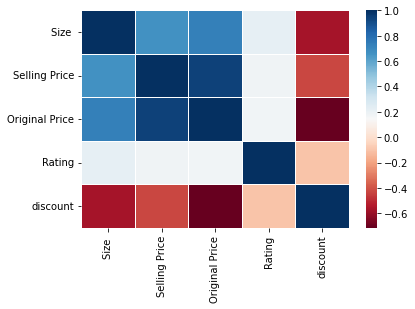

In [78]:
sns.heatmap(tv.corr(), cmap="RdBu", linewidth=1) #visualizing the correlation matrix